In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
measurement = Base.classes.measurement

station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

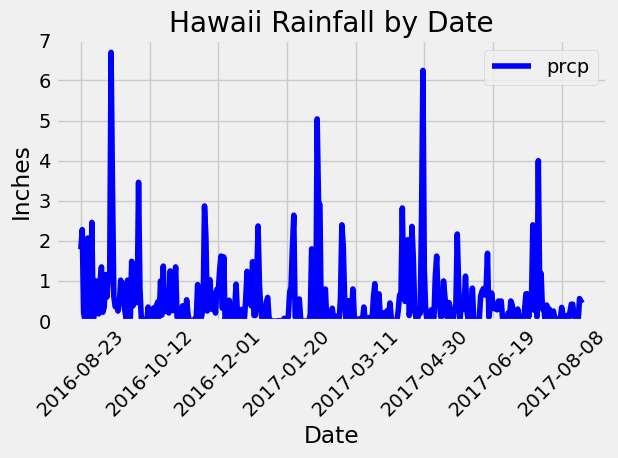

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

sel = [measurement.date, func.max(measurement.prcp)]
average_rain_fall = session.query(*sel).\
    filter(measurement.date >= "2016-08-23").\
    group_by(measurement.date).\
    order_by(measurement.date).all()


df = pd.DataFrame(average_rain_fall, columns=["date", "prcp"])
df.set_index("date", inplace=True)
df.plot(color = "blue", ylim = (0,7), rot = 45)
plt.title("Hawaii Rainfall by Date")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.show()






In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
station_list = session.query(station.name).all()

station_count = session.query(station.station).count()

print(station_list)

print(f"\n\nThere are {station_count} stations in this dataset.")

[('WAIKIKI 717.2, HI US',), ('KANEOHE 838.1, HI US',), ('KUALOA RANCH HEADQUARTERS 886.9, HI US',), ('PEARL CITY, HI US',), ('UPPER WAHIAWA 874.3, HI US',), ('WAIMANALO EXPERIMENTAL FARM, HI US',), ('WAIHEE 837.5, HI US',), ('HONOLULU OBSERVATORY 702.2, HI US',), ('MANOA LYON ARBO 785.2, HI US',)]


There are 9 stations in this dataset.


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_df_info = [station.station, station.name, station.latitude, station.longitude, station.elevation]
station_df_query = session.query(*station_df_info)
station_df = pd.DataFrame(station_df_query)

measurement_df_info = [measurement.station, measurement.date, measurement.prcp, measurement.tobs]
measurement_df_query = session.query(*measurement_df_info)
measurement_df = pd.DataFrame(measurement_df_query)

merge_data = pd.merge(station_df, measurement_df, on="station")
combined_data = merge_data["station"].value_counts()

combined_data

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == "USC00519281")[0][0]

min_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == "USC00519281")[0][0]

avg_temp = round(session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281")[0][0],2)

print(f"Maximum temperature for this station is : {max_temp} degrees\n")

print(f"Minimum temperature for this station is : {min_temp} degrees\n")

print(f"Average temperature for this station is : {avg_temp} degrees")

Maximum temperature for this station is : 85.0 degrees

Minimum temperature for this station is : 54.0 degrees

Average temperature for this station is : 71.66 degrees


C:\Users\Asus\AppData\Local\Temp\ipykernel_11244\3300206082.py:12: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist, bin_edges = scipy.histogram(temp_data, bins = 12)


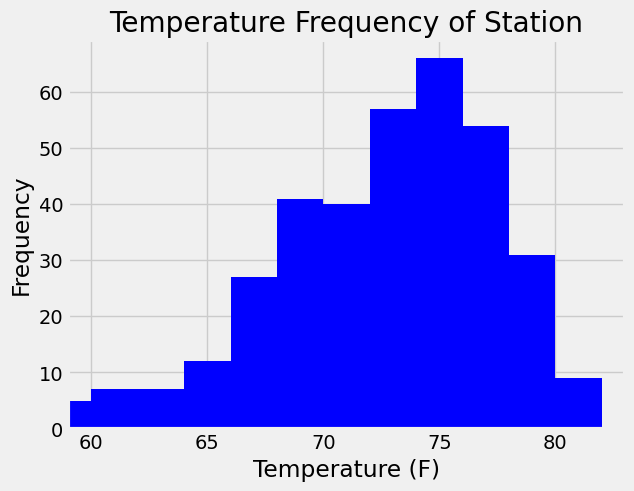

In [17]:
# Using the most active station id
session.query(measurement.station, measurement.date).\
filter(measurement.station == "USC00519281").\
order_by(measurement.date.desc()).first()


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).\
    filter(measurement.date >= "2016-08-19").\
    filter(measurement.station == "USC00519281").all()

hist, bin_edges = scipy.histogram(temp_data, bins = 12)
plt.bar(bin_edges[:-1], hist, width = 2, color = "blue")
plt.title("Temperature Frequency of Station")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.xlim(min(bin_edges), max(bin_edges)) 
plt.show()




# Close session

In [18]:
# Close Session
session.close()